# Part 1 PCA Implementation

In [6]:
%pylab inline
np.set_printoptions(precision = 3)
# PCA Implementation
def pca(X): # I put a k parameter to choose number of pc
    mean = np.zeros(len(X[0])) # It's just initializing mean vector   
    for i in range(len(mean)):
        total = 0
        for row in X:
            total += row[i]
        mean[i]= total/len(X) # calculating mean for all columns
        
    Xsvd = X - mean # Centeralize the data
    u, s, vh = np.linalg.svd(Xsvd, full_matrices=False) # Performing svd
    PCs = u@diag(s) # Principal components are eigenvectors*eigenvalues
    return mean,s,PCs # S vector is our eigenvalues, 



A = np.array([[5, 0, 2, 4]
                     ,[2, 6, 1, 2]])
mean,values,PCs = pca(A)

mean,values,PCs

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([3.5, 3. , 1.5, 3. ]), array([5., 0.]), array([[-3.536,  0.   ],
        [ 3.536,  0.   ]]))

# Part 2 Using PCA

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Shape of train features is: (60000, 28, 28)
Flattened train in 0.8950412273406982 s
Flattened train shape is: (60000, 784)
Pca performed in 1.6480820178985596 s


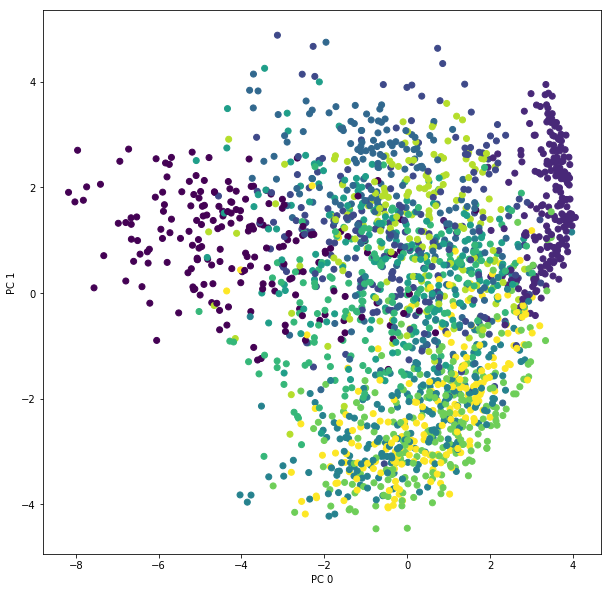

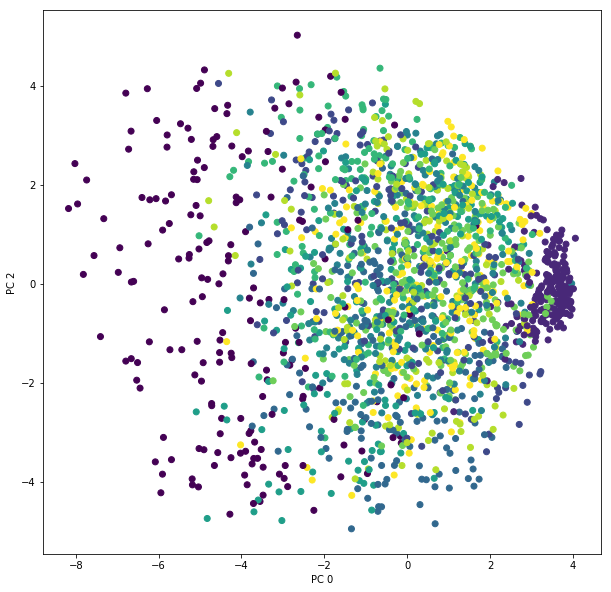

Building random forest with 180 components of PC
Out-of-bag score estimate: 0.801
Mean accuracy score: 0.825
Generating confusion matrix for 180 components


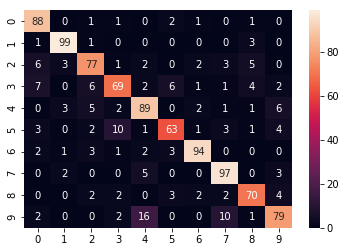

Building random forest with 90 components of PC
Out-of-bag score estimate: 0.843
Mean accuracy score: 0.846
Generating confusion matrix for 90 components


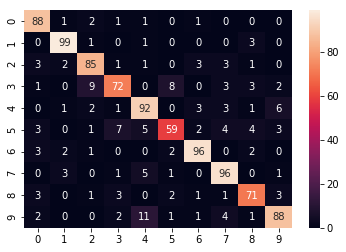

Building random forest with 45 components of PC
Out-of-bag score estimate: 0.861
Mean accuracy score: 0.863
Generating confusion matrix for 45 components


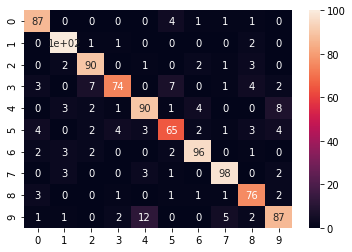

Building random forest with 20 components of PC
Out-of-bag score estimate: 0.854
Mean accuracy score: 0.848
Generating confusion matrix for 20 components


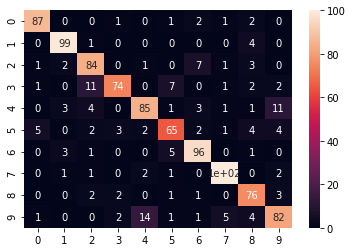

In [7]:
# Using PCA

import os
%pylab inline
import numpy as np
np.set_printoptions(precision=2, suppress = True)
from time import time
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
os.environ["MKL_THREADING_LAYER"] = "GNU"

from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def loadData():
    (x_train, y_train), (x_test, y_test) = mnist.load_data() # We have load dataset, but our features are in 2-dim.

    #Flattening our features
    X_train = np.zeros((len(x_train),len(np.array(x_train[0]).flatten())))
    print("Shape of train features is:",x_train.shape)
    t0 = time()
    for i in range(0,len(x_train)): # Flatten train part
        x_train[i] = np.array(x_train[i])
        X_train[i] =(x_train[i].flatten())/255
    print("Flattened train in",time()-t0,"s")
    print("Flattened train shape is:",X_train.shape)
    return X_train,y_train

def pcaperform(features,labels,count):
    if count*2>=len(features):
        print ("error")
        return -1
    
    t1 = time()
    mean,values,PCs = pca(features[:count*2]) # Performed pca to 2000 images, 1000 will be trained.
    print("Pca performed in",time()-t1,"s")
    
    plotcomponents(PCs,labels[:count*2])
    
    x_train = PCs[:count] # splitting data
    x_test = PCs[count:]
    Y_train = labels[:count*2]
    y_train = Y_train[:count]
    y_test = Y_train[count:]
    
    return x_train,y_train,x_test,y_test

def performRandomForest(train_features,train_labels,test_features,test_labels,componentNo):
    print("Building random forest with",componentNo,"components of PC")
    rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
    rf.fit(x_train[:,:componentNo], y_train)

    predicted = rf.predict(x_test[:,:componentNo])
    accuracy = accuracy_score(y_test, predicted)
    print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
    print(f'Mean accuracy score: {accuracy:.3}')

    print("Generating confusion matrix for",componentNo,"components")
    cm = pd.DataFrame(confusion_matrix(y_test, predicted))
    sns.heatmap(cm, annot=True)
    plt.show()

def plotcomponents(pcs,labels):
    plt.figure(figsize=(10,10))
    plt.scatter(pcs[:, 0], pcs[:, 1], c=labels)
    plt.xlabel("PC 0")
    plt.ylabel("PC 1")
    plt.show()
    plt.figure(figsize=(10,10))
    plt.scatter(pcs[:, 0], pcs[:, 2], c=labels)
    plt.xlabel("PC 0")
    plt.ylabel("PC 2")
    plt.show()


features,labels = loadData()
x_train ,y_train ,x_test ,y_test = pcaperform(features,labels,1000)



performRandomForest(x_train,y_train,x_test,y_test,180)


performRandomForest(x_train,y_train,x_test,y_test,90)


performRandomForest(x_train,y_train,x_test,y_test,45)

performRandomForest(x_train,y_train,x_test,y_test,20)


# Part 3 Comparing Linear and Non-linear Versions of PCA 

Shape of train features is: (60000, 28, 28)
Flattened train in 0.9140450954437256 s
Flattened train shape is: (60000, 784)


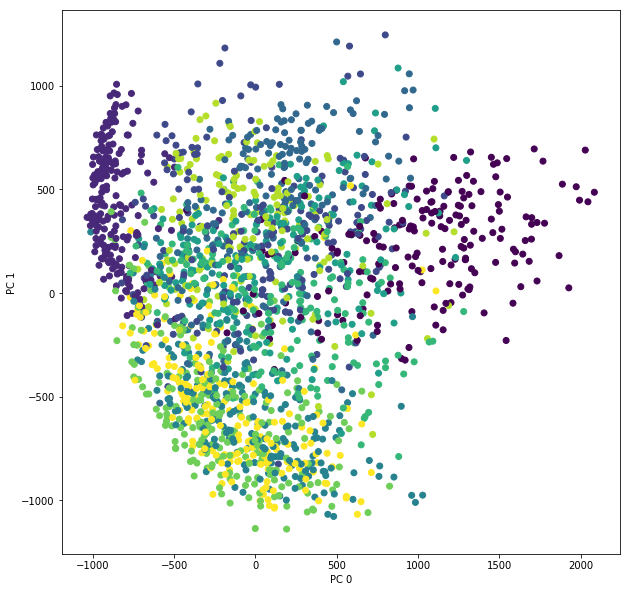

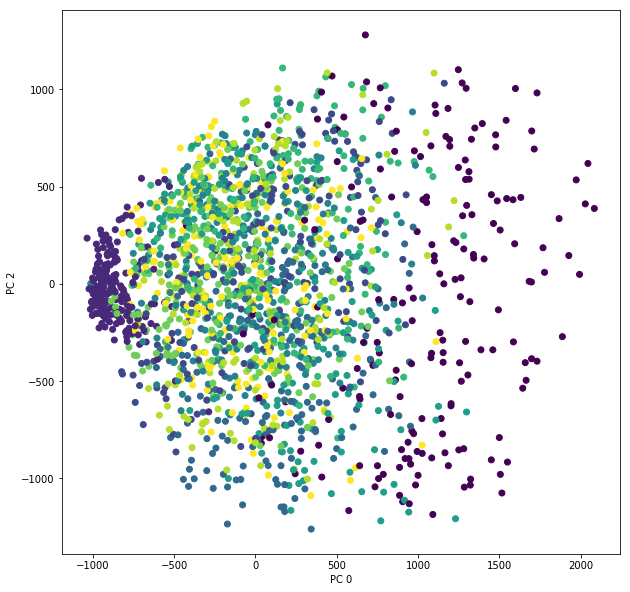

Building random forest with 180 components of PC
Out-of-bag score estimate: 0.807
Mean accuracy score: 0.825
Generating confusion matrix for 180 components


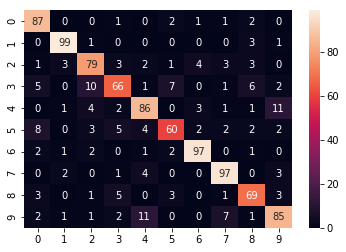

Building random forest with 90 components of PC
Out-of-bag score estimate: 0.834
Mean accuracy score: 0.84
Generating confusion matrix for 90 components


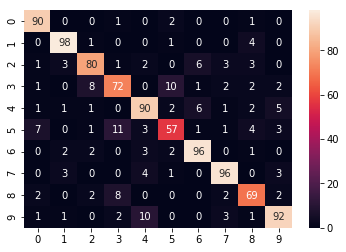

Building random forest with 45 components of PC
Out-of-bag score estimate: 0.856
Mean accuracy score: 0.857
Generating confusion matrix for 45 components


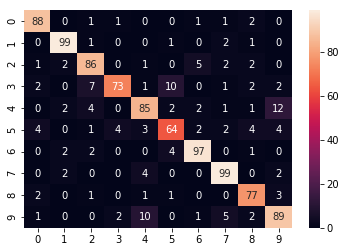

Building random forest with 20 components of PC
Out-of-bag score estimate: 0.871
Mean accuracy score: 0.853
Generating confusion matrix for 20 components


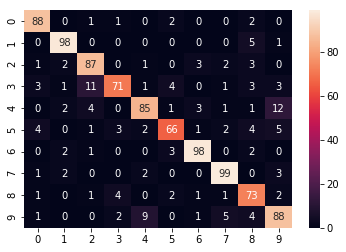

In [8]:
from sklearn.decomposition import KernelPCA,PCA
# Comparing
features,labels = loadData()
for row in features:
    row *=255
pca = PCA(.95)
X_pca = pca.fit_transform(features[:2000])

plotcomponents(X_pca,labels[:2000])

x_train = X_pca[:1000] # splitting data
x_test = X_pca[1000:]
Y_train = labels[:2000]
y_train = Y_train[:1000]
y_test = Y_train[1000:]


performRandomForest(x_train,y_train,x_test,y_test,180)

performRandomForest(x_train,y_train,x_test,y_test,90)

performRandomForest(x_train,y_train,x_test,y_test,45)

performRandomForest(x_train,y_train,x_test,y_test,20)






Shape of train features is: (60000, 28, 28)
Flattened train in 0.9640495777130127 s
Flattened train shape is: (60000, 784)


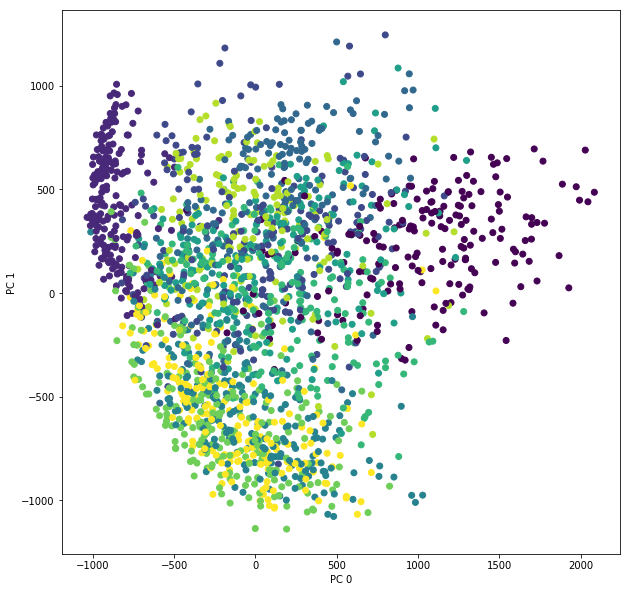

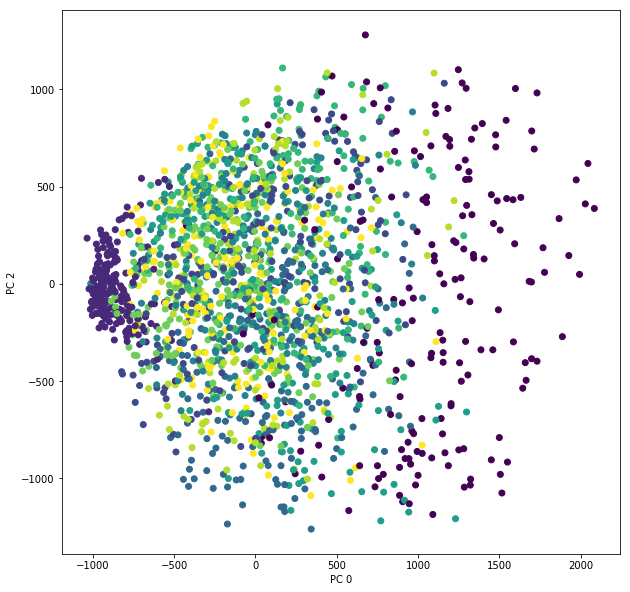

Building random forest with 180 components of PC
Out-of-bag score estimate: 0.087
Mean accuracy score: 0.123
Generating confusion matrix for 180 components


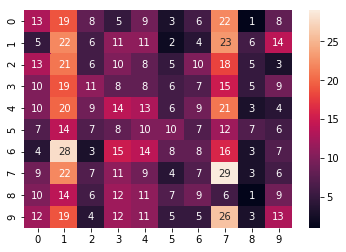

Building random forest with 90 components of PC
Out-of-bag score estimate: 0.095
Mean accuracy score: 0.106
Generating confusion matrix for 90 components


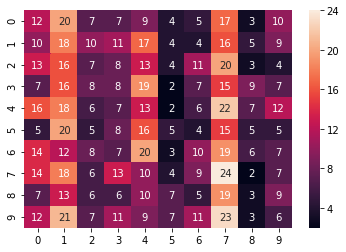

Building random forest with 45 components of PC
Out-of-bag score estimate: 0.102
Mean accuracy score: 0.099
Generating confusion matrix for 45 components


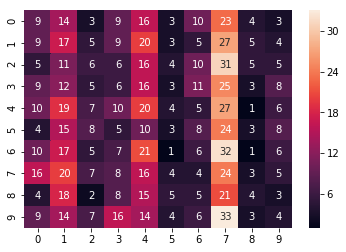

Building random forest with 20 components of PC
Out-of-bag score estimate: 0.09
Mean accuracy score: 0.108
Generating confusion matrix for 20 components


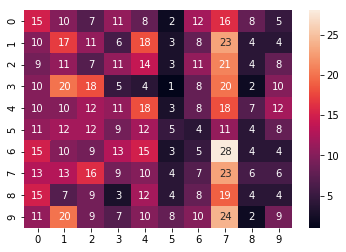

In [11]:
from sklearn.decomposition import KernelPCA,PCA
# Comparing
features,labels = loadData()
for row in features:
    row *=255

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=0.05,n_components=180)
X_kpca = kpca.fit_transform(features[:2000])
plotcomponents(X_pca,labels[:2000])

x_train = X_kpca[:1000] # splitting data
x_test = X_kpca[1000:]
Y_train = labels[:2000]
y_train = Y_train[:1000]
y_test = Y_train[1000:]


performRandomForest(x_train,y_train,x_test,y_test,180)

performRandomForest(x_train,y_train,x_test,y_test,90)

performRandomForest(x_train,y_train,x_test,y_test,45)

performRandomForest(x_train,y_train,x_test,y_test,20)